In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [3]:
from sklearn. datasets import make_classification

In [4]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [5]:
ns_probs = [0 for _ in range (len(testy))]

In [6]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
# Predecimos Las probabilidades
Ir_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
Ir_probs = Ir_probs[:, 1]

In [8]:
ns_auc = roc_auc_score(testy, ns_probs)
Ir_auc = roc_auc_score(testy, Ir_probs)

In [9]:
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (Ir_auc))

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.903


In [10]:
# Calculamos las curvas ROC

# 1. Calculamos la curva para el modelo "Sin entrenar"
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)

# 2. Calculamos la curva para el modelo de Regresión Logística

lr_fpr, lr_tpr, _ = roc_curve(testy, Ir_probs)

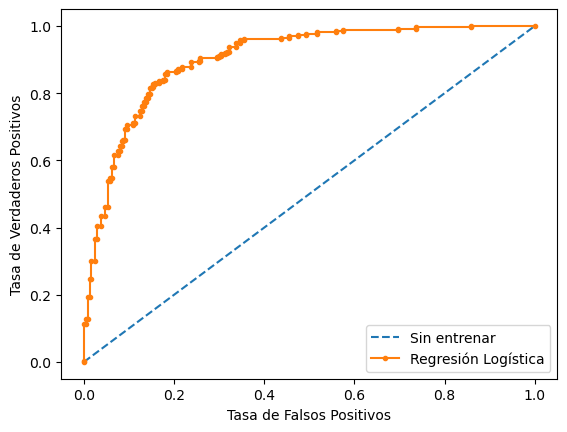

In [11]:
# Graficamos Las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de Los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()